# <center> CS559 Final Project: Handwriting Recognition </center>
## <center> Due: 8/19/2021 Thursday at 11:59 PM</center>
## <center> By: Aughdon Breslin</center>

Handwriting recognition is a well-studied subject in computer vision and has found wide applications in our daily life (such as USPS mail sorting).  \
\
In this project, we will explore various machine learning techniques for recognizing handwriting digits. The dataset you will be using is the well-known MNIST dataset. \
\
(1)	The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. (http://yann.lecun.com/exdb/mnist/) \
\
Below is an example of some digits from the MNIST dataset.

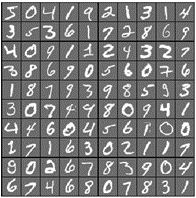
 
The goal of this project is to build a 10-class classifier to recognize those handwriting digits as accurately as you can.  All the assignments below should use the training data (60K examples) and test data (10 K examples) as given by the dataset.
Here are the basic requirements for this project.


### Clarification
Dear Class, 

I would like to make clarification on project 2. 

1. Number of Models

    In Task #1, where it says "four models", it implies the total number of models combined with Task #2 - two basic classifiers from Task #1 and Neural Networks and Deep Learning from Task #2. \
    \
    Please do not confuse that you do not need to make four models in Task #1. The accuracy of the four models must be reported.
    
    
2. Task #3

    You are going to write each digit five times.  
    Classify your written digits using four models made from Task #1 and #2. 
    An example of reading the image and converting it to pixels is provided in the Lecture 10 demonstration file. 
Then report the accuracy of models. 

In [1]:
import numpy as np
import keras
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from matplotlib import pyplot as plt
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD

import cv2 

In [2]:
# Load the MNIST dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


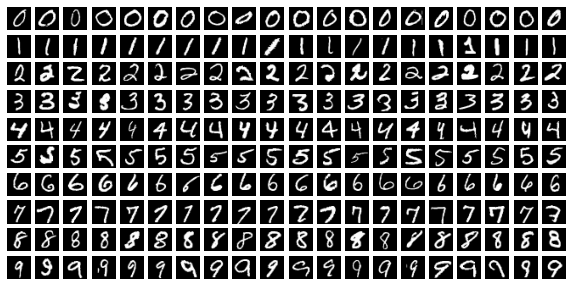

In [4]:
# Plot a semi-random selection of the training dataset, 20 of each number
f, chart = plt.subplots(nrows=10, ncols=20, figsize=(10, 5))
for i in range(20):
    for j in range(10):
        x_j = X_train[y_train == j]
        chart[j][i].imshow(x_j[random.randint(0, len(x_j)-1), :, :], cmap=plt.get_cmap('gray')) 
        chart[j][i].axis("off")

In [5]:
# Convert results in numbers to a 1 in one of ten classes
# [1,0,0,0,0,...] represents the 0 class, [0,1,0,0,0,...] represents the 1 class, and on up to [0,0,...,1] representing 9
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

y_train: (60000, 10)
y_test: (10000, 10)


### Question #1 ###
Build a number of non DNN based classifiers using all pixels as features for handwriting recognition. You need to use at least two the following four techniques we have learned from the class to do the work: 
 - Decision tree
 - Random forest
 - XGBoost

For each technique, please use your own language to give a general description of the technique, its pros and cons, and why such a technique is suitable for solving the handwriting recognition problem. The goal is to make sure you know why you decide to choose this technique.
Please also make a comparison table among the four techniques as well as the method from Assignment #1 above.


In [6]:
# Get a copy of the dataset for manipulation
X1_train = X_train
X1_test = X_test

# Reshape the 28x28 pixels into one 1x784 long array
X1_train = X1_train.reshape(X1_train.shape[0], 28*28)
X1_test = X1_test.reshape(X1_test.shape[0], 28*28)

# Normalize the intensity of the grayscale values
X1_train = X1_train/255
X1_test = X1_test/255

print('X1_train:', X1_train.shape)
print('X1_test:', X1_test.shape)

X1_train: (60000, 784)
X1_test: (10000, 784)


#### Decision Tree

A decision tree is a way to split up the dataset based on the feature that best divides the larger data into focused subsets. At each branch of the tree, the best attribute is selected and at a corresponding value that attempts to best segregate one class from another, or multiple classes from each other. It is through this recursive process that we are later able to pass in new data, and follow the branches that it fits into to lead us down to a leaf node where a conclusive answer about the classification is given. We then use this answer as our prediction for the input.

The advantages of the decision tree are that it doesn't require data normalization or scaling, it's much more intuitive for humans to follow the decision making process, and it's not very vulnerable to missing values in the dataset.

The disadvantages of decision trees are that small variations in the dataset can lead to massive changes in the branching and overall structure of the tree, it is less cost-efficient as it typically takes a longer time to train the model and tends to have a higher complexity.

This algorithm is suitable for handwriting recognition classification because it is able to take in a vast amount of data and find the best way to split these numbers based on similar features they have represented in the 28\*28 array. This means numbers that are similar to each other will be more likely to be grouped together, so even if the data ends up misclassified, the guesses will still be reasonably accurate and the numbers with very similar features will still be grouped together for future predictions.

DT Accuracy: 0.8758


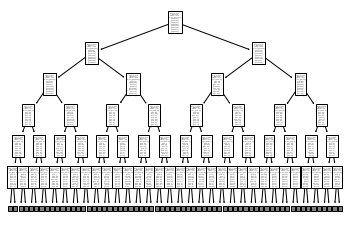

In [7]:
# Decision Tree
dt = DecisionTreeClassifier()

# fit the model
dt.fit(X1_train, y_train)

#plot the first 5 levels of branching
plot_tree(dt,max_depth = 5)

# make predictions
y_pred = dt.predict(X1_test)

# printing the test accuracy
DTAccuracy = accuracy_score(y_test, y_pred)
print("DT Accuracy:", DTAccuracy)

In [8]:
# Show a sample of the prediction results against actual categories
print(y_pred[:10])
print(y_test[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


#### Random Forest

The random forest algorithm is a way to classify data via making many decision trees and taking advantage of their high variability from changes in the data structure to create a diverse set of decision trees. It then uses this diverse set of trees and tallies their predicted outputs, typically taking the mean or mode result from the many trees to use as its individual predicted result.

The advantages of the random forest is that it is much more robust to outliers, has a lower risk of overfitting, and its very efficient to run on large data.

The disadvantages of the random forest however, is that if the decision trees are poor predictors, it will pool together poor results and pick a poor result as its final prediction. This makes it very important to make sure the weaker classifiers are still good on their own before combining many of them and taking their votes. Random forests, for similar reasons as decision trees themselves, also have slow training.

This algorithm is suitable for handwriting recognition because it follows the same principles as decision trees, and it pools together their results to create its own. This means the similar features will still be grouped together at every step, and the most commonly predicted output from the decision trees will still be the output of the random forest, leading to typically similar results as individual decision trees, however outliers from any one decision tree are mitigated by the results from the other decision trees used in the votes.

RF Accuracy: 0.9041


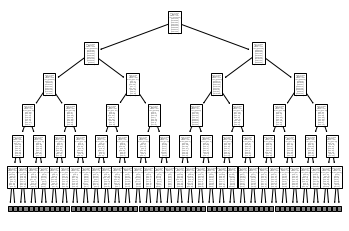

In [9]:
# Random Forest
rf = RandomForestClassifier()

# fit the model
rf.fit(X1_train, y_train)

#The first decision tree of many, as accessed by the index of the estimators, 
plot_tree(rf.estimators_[0],max_depth = 5)

# make predictions
y_pred = rf.predict(X1_test)

# printing the test accuracy
RFAccuracy = accuracy_score(y_test, y_pred)
print("RF Accuracy:", RFAccuracy)

In [10]:
# Sample of predictions vs results
print(y_pred[:10])
print(y_test[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Assignment #2
In this assignment, we will explore various techniques related to neural network and deep learning to solve the 10-class classification problem. \
\
Since there are many existing implementations to solve the MINST problem, we need to give some twists to this problem to make it worthwhile to do for our final project. (Please refer to the ranking list for MNIST at http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html.) \
\
The basic network structure that we are trying to explore is something like the following (i.e., the fully connected deep neural nets). The number of hidden layers and the size of each hidden layer in terms of neurons are left as tuning parameters that you can explore.


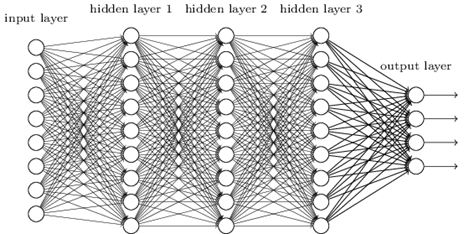

 - Neural Networks and Deep Learning from Task #2.\
 NN and CNN

#### Neural Network

Neural Networks are systems of node layers, as depicted above, starting with an input layer, a varying number of hidden layers, followed by an output layer that corresponds to a classification category. Each node is given input data from the previous layer, a weight, and produces output data to send to the next layer of nodes. The nodes act as linear regression models to contribute towards the final output, and are modeled to mimick the human brain firing neurons.

The advantages of neural networks are that they are very flexible and can be trained with any number of inputs and layers. They are very reliable in even complex problems, and once the training is completed, they are able to make predictions quickly.

The disadvantages of neural networks are that they lack the intuition to follow and thus are black boxes in terms of figuring out how much each variable is influencing the output and following the line of reasoning that leads to it. They are expensive to train and tend to require a lot of data, meaning they may be vulnerable to overfitting or tuning too specifically to the data provided.

Neural networks are suitable for handwriting recognition because MNIST has a massive dataset of images as well as many input features (each pixel of the image) that neural networks have no issues handling and processing. They work really well with large data and it shows in their prediction accuracy results.

In [11]:
# Create the base model
model = Sequential(name= "MNIST_Neural_Network")

# And add my hidden layers leading to the output layer, where the first layer takes in the input shape of 28*28 
# and outputs 512, as shown in the summary
model.add(Dense(512, activation='relu',input_shape = (28*28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Create the learning optimizer
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Showcase the model layout
model.summary()

Model: "MNIST_Neural_Network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Fit the model
history = model.fit(X1_train, y_train, epochs=10, batch_size=32, validation_data=(X1_test, y_test), verbose =1)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2455 - accuracy: 0.9254 - val_loss: 0.1047 - val_accuracy: 0.9688
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0933 - accuracy: 0.9708 - val_loss: 0.0807 - val_accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0617 - accuracy: 0.9805 - val_loss: 0.0711 - val_accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0423 - accuracy: 0.9863 - val_loss: 0.0890 - val_accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0756 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0691 - val_accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0864 - val_accuracy:

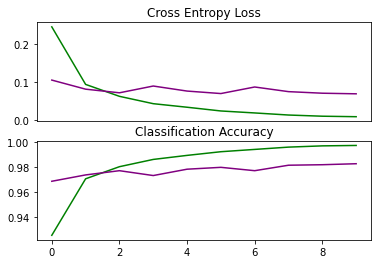

In [13]:
#Showcase some of the characteristics of the NN
plt.subplot(211)

plt.title("Cross Entropy Loss")
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="purple")
plt.xticks([])

plt.subplot(212)
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color = "green")
plt.plot(history.history["val_accuracy"], color = "purple")
plt.show()

In [14]:
# make predictions (much quicker than the training process)
y1_pred = model.predict(X1_test)

In [15]:
#formatting the images predictions
y1_pred2 = [[]]*10000
for i in range(len(y1_pred)):
    maxValue = np.argmax(y1_pred[i])
    y1_pred2[i] = [0]*10
    y1_pred2[i][maxValue] = 1

In [16]:
# show before and after of predictions into readable format with one category
print(y1_pred[:10])
print(y1_pred2[:10])

[[9.25065840e-12 7.98343114e-10 2.39728810e-11 1.99272265e-09
  1.21669758e-11 2.53214442e-13 1.09686088e-16 9.99999881e-01
  1.38244798e-12 1.68589267e-07]
 [6.32442779e-11 2.39956921e-09 1.00000000e+00 2.13777246e-10
  8.48243120e-14 6.98915589e-13 3.08323115e-12 2.03077117e-12
  5.37425139e-12 2.49614509e-18]
 [5.91246563e-09 9.99979377e-01 8.59233808e-07 2.68705747e-09
  1.86393777e-06 1.27899273e-08 2.72322769e-08 1.73409444e-05
  5.96042980e-07 2.10386886e-09]
 [9.99999285e-01 1.00736131e-09 3.49769707e-08 1.52962129e-10
  5.82396492e-11 2.20517563e-11 7.18792251e-07 4.60665772e-09
  3.48090545e-12 3.82275722e-08]
 [4.00281186e-09 6.86232071e-10 8.69550543e-11 2.57442044e-14
  9.99998689e-01 2.09552480e-11 2.46731108e-10 2.06562678e-08
  1.72600493e-11 1.27350518e-06]
 [3.77050474e-10 9.99985456e-01 2.37453435e-09 1.03045072e-10
  7.94337751e-08 4.56442419e-11 7.82048384e-11 1.44383675e-05
  5.37812177e-08 8.43109263e-11]
 [4.97664464e-13 2.63834440e-11 3.97230832e-13 6.21599330e

NN Accuracy: 0.9829


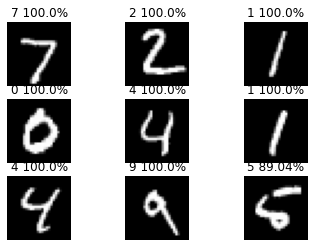

In [17]:
# Give a sample of confidence % with different images
for i in range(9):
  plt.subplot(331 + i)
  plt.axis('off')
  plt.imshow(X_test[i].reshape(28,28), cmap = plt.get_cmap('gray'))
  pred = y1_pred[i]
  maxValue = np.argmax(pred)
  confidence = pred[maxValue]
  plt.title("{} {}%".format(maxValue, round(confidence*100, 2)))

# printing the test accuracy
NNAccuracy = accuracy_score(y_test, y1_pred2)
print("NN Accuracy:", NNAccuracy)

#### Convolutional Neural Network

A convolutional neural network is a specific type of neural network more geared towards input images where it is able to condense layers through convolutional filters that maintain proximity based features in a more condensed representation. This way it is able to capture spacial features and assign importance to them against other features in order to create its predictions.

The advantages of a CNN are that they are parallelizable, only relying on local context for each convolutional state, they are able to capture spacial features much better than other algorithms, and prioritize those features over less valuable ones to reduce dimensionality without sacrificing accuracy. 

The disadvantages of a CNN are that they have a high computational cost, are slow to train for complex tasks, and similarly to neural networks they depend on a very large dataset to create accurate predictions.

Convolutional neural networks are suitable for handwriting recognition because they do a great job capturing the spacial features that are critical in recognizing the features that make up a number, such as the curved top of a two, the angle of a seven, the circles and extending arms of 6 and 9, and other distinguishing features that make each number unique across varying handwriting styles. This suitability is also shown in their impressive accuracy results both on MNIST test data and brand-new personally handwritten data.

In [18]:
# Gain a copy of the dataset for different manipulation
X2_train = X_train
X2_test = X_test

# Reshape 28x28 into 28x28x1 instead
X2_train = X2_train.reshape(X2_train.shape[0], 28,28,1)
X2_test = X2_test.reshape(X2_test.shape[0], 28,28,1)
X2_train = X2_train/255
X2_test = X2_test/255

print("X2_train:",X2_train.shape)
print("X2_test:",X2_test.shape)

X2_train: (60000, 28, 28, 1)
X2_test: (10000, 28, 28, 1)


In [19]:
# CNN version
model = Sequential(name = "MNIST_Convolutional_Neural_Network")

#2D convolutional layer
model.add(Conv2D(32, (3, 3), activation = "relu", kernel_initializer = 'he_uniform', input_shape = (28,28,1)))

#pool and flatten
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

#dense layers to produce the results
model.add(Dense(100, activation = "relu", kernel_initializer = "he_uniform"))
model.add(Dense(10, activation = 'softmax' ))

#optimizer
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Showcase model layout
model.summary()

Model: "MNIST_Convolutional_Neural_Network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [20]:
#fit the data, showing the progress as the epochs advance
history = model.fit(X2_train, y_train, epochs=10, batch_size=32, validation_data=(X2_test, y_test), verbose =1)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1645 - accuracy: 0.9508 - val_loss: 0.0632 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0541 - accuracy: 0.9839 - val_loss: 0.0509 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0352 - accuracy: 0.9897 - val_loss: 0.0489 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0245 - accuracy: 0.9930 - val_loss: 0.0417 - val_accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0175 - accuracy: 0.9949 - val_loss: 0.0418 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0120 - accuracy: 0.9968 - val_loss: 0.0464 - val_accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0420 - val_ac

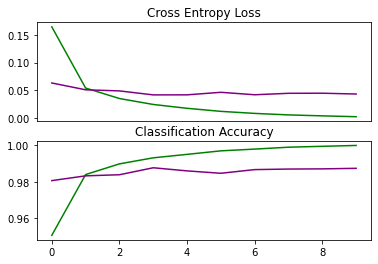

In [21]:
#Showcase some of the characteristics of the CNN
plt.subplot(211)

plt.title("Cross Entropy Loss")
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="purple")
plt.xticks([])

plt.subplot(212)
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color = "green")
plt.plot(history.history["val_accuracy"], color = "purple")
plt.show()

In [22]:
#predict the results
y2_pred = model.predict(X2_test)

In [23]:
#formatting the images predictions
y2_pred2 = [[]]*10000
for i in range(len(y2_pred)):
    maxValue = np.argmax(y2_pred[i])
    y2_pred2[i] = [0]*10
    y2_pred2[i][maxValue] = 1

In [24]:
# show before and after of predictions into readable format with one category
print(y2_pred[:10])
print(y2_pred2[:10])

[[8.89633939e-12 7.75828024e-09 1.03676365e-08 4.75080952e-08
  3.28409383e-11 1.61394363e-13 1.66428574e-14 1.00000000e+00
  7.24402552e-11 2.53594784e-10]
 [5.46744428e-10 4.89539165e-09 1.00000000e+00 8.98335226e-12
  2.16755155e-14 8.00346741e-17 2.13912135e-11 8.81905040e-15
  1.35260275e-11 9.48176559e-15]
 [3.47860585e-08 9.99994516e-01 2.51668624e-08 5.70344397e-11
  1.58199691e-06 3.75201564e-10 1.37675435e-08 2.02458023e-06
  1.76045751e-06 3.64448893e-09]
 [1.00000000e+00 1.27596725e-10 1.81453412e-08 9.45496285e-12
  1.44055379e-09 1.30913780e-12 1.47243684e-08 7.02695813e-09
  3.62768152e-14 6.69059086e-10]
 [9.05216874e-12 9.30863442e-10 1.08824130e-10 2.57680561e-11
  9.99998093e-01 1.52809640e-11 9.26805993e-11 1.06317932e-08
  1.20654919e-09 1.96034307e-06]
 [2.74062245e-10 9.99988437e-01 6.85852097e-10 9.30313899e-12
  9.52197752e-08 1.24666716e-12 1.37979073e-11 1.14913310e-05
  3.50099647e-08 2.43691817e-10]
 [2.68618237e-14 1.37478784e-08 7.00004638e-11 2.38217150e

CNN Accuracy: 0.9873


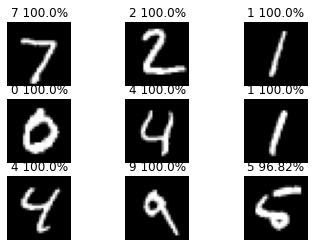

In [25]:
# Give a sample of confidence % with different images
for i in range(9):
  plt.subplot(331 + i)
  plt.axis('off')
  plt.imshow(X_test[i].reshape(28,28), cmap = plt.get_cmap('gray'))
  pred = y2_pred[i]
  maxValue = np.argmax(pred)
  confidence = pred[maxValue]
  plt.title("{} {}%".format(maxValue, round(confidence*100, 2)))

# printing the test accuracy
CNNAccuracy = accuracy_score(y_test, y2_pred2)
print("CNN Accuracy:", CNNAccuracy)

### Question #3 
This assignment reflects the data collection process. Everyone is required to 
 - Hand write 5 styles of your own digits from 0 to 9 on a paper, and make sure your own handwritings are for sure recognizable by yourself. Please take a picture of each digit you write (so you have total 5 x 10 = 50 images), resize and convert it to the same data input format as the MNIST dataset. In other words, you have 50 new data points with labels.
 - Treat these 50 images as “brand-new” test dataset and run your own ML models from Assignment #1 - #4 on these 50 images and report the achieved test accuracy. Note, the goal for this exercise is not for achieving “high” accuracy, but to show what potential gaps there may be between existing MNIST dataset and your own test dataset, a scenario you would encounter in real life.


In [26]:
# Create test results where first 5 are 0, next 5 are 1, and so on until last 5 are 9
images_test = np.array([[0] * 10]*50)
for i in range(50):
    images_test[i][i//5] = 1

#### Importing My Own Images

In [27]:
# Initialize array to take in images
images = []
for num in range(10):
    for pos in range(1,6):
        # Load sample image
        file = r'HandwrittenImages2/{}-{}.jpg'.format(num,pos)
        test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

        # Format image
        img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
        img_resized = cv2.bitwise_not(img_resized)
        
        # Recolor
        img_resized = np.where(img_resized > 70, 1, 0)

        # Add reformatted image
        images.append(img_resized)


In [28]:
# Reshape 28x28 images into 784, similar to X1_train on MNIST dataset
images_X = np.array(images)
images_X = images_X.reshape(images_X.shape[0], 28*28)
print(images_X.shape)

(50, 784)


The first 5 are 0s, the next 5 are 1s, and so on up until the last 5 which are 9s.


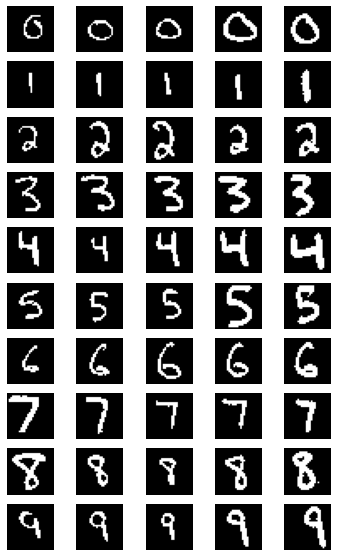

In [29]:
# Set up in 10x5 format
f, chart = plt.subplots(10,5,figsize=(6,10))
for i in range(0,10,2):
    for j in range(10):
        if(j<5):
            chart[i][j].imshow(images[i*5+j], cmap='gray')
            chart[i][j].axis("off")
        else:
            chart[i+1][j-5].imshow(images[i*5+j], cmap='gray')
            chart[i+1][j-5].axis("off")
print("The first 5 are 0s, the next 5 are 1s, and so on up until the last 5 which are 9s.")

#### Decision Tree

Handwritten DT Accuracy: 0.5


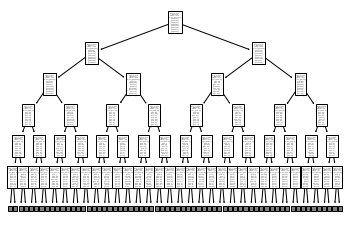

In [30]:
# Decision Tree
dt = DecisionTreeClassifier()

# fit the model
dt.fit(X1_train, y_train)

#plot the first 5 levels of branching
plot_tree(dt,max_depth = 5)

# make predictions
images_pred = dt.predict(images_X)

# printing the test accuracy
handDTAccuracy = accuracy_score(images_test, images_pred)
print("Handwritten DT Accuracy:", handDTAccuracy)

#### Random Forest

RF Accuracy: 0.28


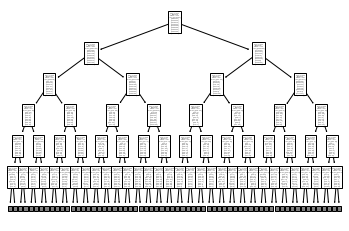

In [31]:
# Random Forest
rf = RandomForestClassifier()

# fit the model
rf.fit(X1_train, y_train)

#The first decision tree of many, as accessed by the index of the estimators, 
plot_tree(rf.estimators_[0],max_depth = 5)

# make predictions
images_pred = rf.predict(images_X)

# printing the test accuracy
handRFAccuracy = accuracy_score(images_test, images_pred)
print("RF Accuracy:", handRFAccuracy)

#### Neural Network

In [32]:
#Create model base for Neural Network
model = Sequential(name= "MNIST_Neural_Network")

# Add in multiple layers starting with the input and gradually decreasing down to 10 output nodes
# One for each category
model.add(Dense(512, activation='relu',input_shape = (28*28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Create the learning optimizer
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Show the layers in action
model.summary()

Model: "MNIST_Neural_Network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Fit and show the progression of the model
history = model.fit(X1_train, y_train, epochs=10, batch_size=32, validation_data=(X1_test, y_test), verbose =1)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2486 - accuracy: 0.9258 - val_loss: 0.1229 - val_accuracy: 0.9605
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0919 - accuracy: 0.9718 - val_loss: 0.0869 - val_accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0608 - accuracy: 0.9810 - val_loss: 0.0894 - val_accuracy: 0.9710
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0804 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0654 - val_accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0721 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0687 - val_accuracy:

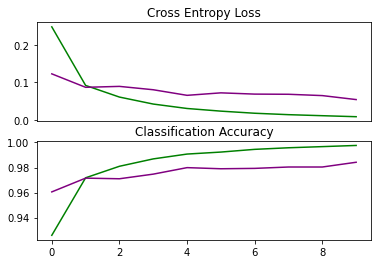

In [34]:
#Showcase some of the characteristics of the NN
plt.subplot(211)

plt.title("Cross Entropy Loss")
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="purple")
plt.xticks([])

plt.subplot(212)
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color = "green")
plt.plot(history.history["val_accuracy"], color = "purple")
plt.show()

In [35]:
# Predict on my personal digits
images_pred = model.predict(images_X)

In [36]:
#formatting the images predictions
images_pred2 = [[]]*50
for i in range(len(images_pred)):
    maxValue = np.argmax(images_pred[i])
    images_pred2[i] = [0]*10
    images_pred2[i][maxValue] = 1

Hand NN Accuracy: 0.88


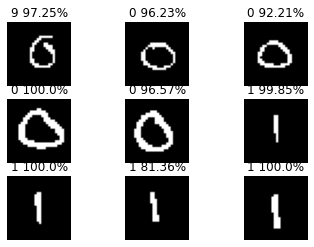

In [37]:
# Give a sample of confidence % with different images
for i in range(9):
  plt.subplot(331 + i)
  plt.axis('off')
  plt.imshow(images_X[i].reshape(28,28), cmap = plt.get_cmap('gray'))
  pred = images_pred[i]
  maxValue = np.argmax(pred)
  confidence = pred[maxValue]
  plt.title("{} {}%".format(maxValue, round(confidence*100, 2)))

# printing the test accuracy
handNNAccuracy = accuracy_score(images_test, images_pred2)
print("Hand NN Accuracy:", handNNAccuracy)

In [38]:
# Show a sample of the prediction results against actual categories
print(images_pred2[:10])
print(images_test[:10])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]
[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


#### Convolutional Neural Network

In [39]:
# Reshape data for manipulation similar to X2_train
images_X2 = np.array(images)
images_X2 = images_X2.reshape(images_X2.shape[0], 28,28,1)
print(images_X2.shape)

(50, 28, 28, 1)


In [40]:
model = Sequential(name = "MNIST_CNN")

#Create convolutional filter layer
model.add(Conv2D(32, (3, 3), activation = "relu", kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

#Create density layers
model.add(Dense(100, activation = "relu", kernel_initializer = "he_uniform"))
model.add(Dense(10, activation = 'softmax' ))

# Create learning optimizer
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Show summary of the model configuration
model.summary()

Model: "MNIST_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [41]:
#Fit and show progression of accuracy
history = model.fit(X2_train, y_train, epochs=10, batch_size=32, validation_data=(X2_test, y_test), verbose =1)

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1631 - accuracy: 0.9500 - val_loss: 0.0608 - val_accuracy: 0.9801
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0564 - accuracy: 0.9834 - val_loss: 0.0436 - val_accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.0441 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0469 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0167 - accuracy: 0.9955 - val_loss: 0.0382 - val_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0119 - accuracy: 0.9968 - val_loss: 0.0393 - val_accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 0.0391 - val_ac

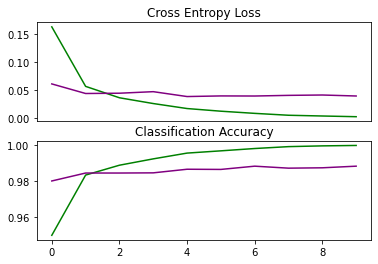

In [42]:
#Showcase some of the characteristics of the CNN
plt.subplot(211)

plt.title("Cross Entropy Loss")
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="purple")
plt.xticks([])

plt.subplot(212)
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color = "green")
plt.plot(history.history["val_accuracy"], color = "purple")
plt.show()

In [43]:
# Fit on the brand new images
images_pred = model.predict(images_X2)

In [44]:
#formatting the images predictions
images_pred2 = [[]]*50
for i in range(len(images_pred)):
    maxValue = np.argmax(images_pred[i])
    images_pred2[i] = [0]*10
    images_pred2[i][maxValue] = 1

CNN Accuracy: 0.9


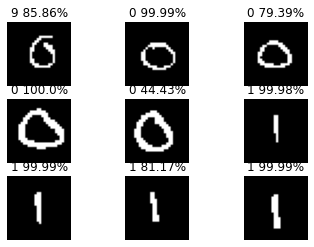

In [45]:
# Give a sample of confidence % with different images
for i in range(9):
  plt.subplot(331 + i)
  plt.axis('off')
  plt.imshow(images_X2[i].reshape(28,28), cmap = plt.get_cmap('gray'))
  pred = images_pred[i]
  maxValue = np.argmax(pred)
  confidence = pred[maxValue]
  plt.title("{} {}%".format(maxValue, round(confidence*100, 2)))

# printing the test accuracy
handCNNAccuracy = accuracy_score(images_test, images_pred2)
print("CNN Accuracy:", handCNNAccuracy)

In [46]:
# Give sample of the images results vs predictions
print(images_test[:10])
print(images_pred2[:10])

[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]


#### Results

In [47]:
# Print accuracies of each model for MNIST dataset and then for Handwritten Images
print("DT Accuracy:", DTAccuracy,
      "\nRF Accuracy:", RFAccuracy, 
      "\nNN Accuracy:", NNAccuracy,
      "\nCNN Accuracy:", CNNAccuracy)
print("\nHand DT Accuracy:", handDTAccuracy,
      "\nHand RF Accuracy:", handRFAccuracy, 
      "\nHand NN Accuracy:", handNNAccuracy,
      "\nHand CNN Accuracy:", handCNNAccuracy)

DT Accuracy: 0.8758 
RF Accuracy: 0.9041 
NN Accuracy: 0.9829 
CNN Accuracy: 0.9873

Hand DT Accuracy: 0.5 
Hand RF Accuracy: 0.28 
Hand NN Accuracy: 0.88 
Hand CNN Accuracy: 0.9
